## Intro to Tensorflow  - Week 1 & 2
---
This notebook is one of probably several focused on the coding components of the Coursera course [Intro To Tensorflow](https://www.coursera.org/learn/introduction-tensorflow)

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#### Week 1 Super simple model

In [2]:
# Decalring our model
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
# Defining our data
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [3]:
# Learning the pattern
model.fit(xs, ys, epochs=800)
# Using our model to predict.
print(model.predict([10.0, 15.0]))

Instructions for updating:
Use tf.cast instead.
Epoch 1/800
6/6 [==============================] - 0s 35ms/sample - loss: 11.5018
Epoch 2/800
6/6 [==============================] - 0s 117us/sample - loss: 9.2691
Epoch 3/800
6/6 [==============================] - 0s 122us/sample - loss: 7.5081
Epoch 4/800
6/6 [==============================] - 0s 108us/sample - loss: 6.1181
Epoch 5/800
6/6 [==============================] - 0s 120us/sample - loss: 5.0202
Epoch 6/800
6/6 [==============================] - 0s 104us/sample - loss: 4.1522
Epoch 7/800
6/6 [==============================] - 0s 128us/sample - loss: 3.4652
Epoch 8/800
6/6 [==============================] - 0s 111us/sample - loss: 2.9206
Epoch 9/800
6/6 [==============================] - 0s 121us/sample - loss: 2.4881
Epoch 10/800
6/6 [==============================] - 0s 117us/sample - loss: 2.1439
Epoch 11/800
6/6 [==============================] - 0s 129us/sample - loss: 1.8693
Epoch 12/800
6/6 [==============================

### Week 2 Fashion MNIST Problem
We are going to use a series of grayscale images of clothing to train our model to
recognize types of clothing

In [3]:
# Acquirring and splitting our data
fashion_data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

# Normalizing pixel values
train_images = train_images/255
test_images = test_images/255

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  # Input layer (shape of incoming data)
    keras.layers.Dense(256, activation=tf.nn.relu),  # THis layer does the work
    keras.layers.Dense(10, activation=tf.nn.softmax)  # Output layer (shape of classification)
])

Instructions for updating:
Colocations handled automatically by placer.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


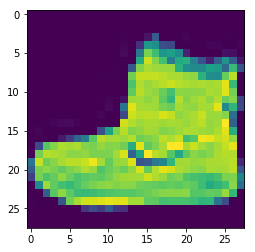

In [4]:
plt.imshow(train_images[0])
model.summary()

In [6]:
# Defining a callback funciton we can pass to the model for fitting, to stop when we get the loss value
# we want <= NIFTY!
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')< 0.3):
            print(logs)
            print('\n Loss has dropped below threshold, canceling training.')
            self.model.stop_training = True

In [7]:

model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20, callbacks=[MyCallback()])

Epoch 1/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4848 - acc: 0.8280
Epoch 2/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3645 - acc: 0.8670
Epoch 3/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3280 - acc: 0.8800
Epoch 4/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3050 - acc: 0.8883
Epoch 5/20
59776/60000 [============================>.] - ETA: 0s - loss: 0.2867 - acc: 0.8933{'loss': 0.2868621840973695, 'acc': 0.89321667}

 Loss has dropped below threshold, canceling training.
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2869 - acc: 0.8932


In [8]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.3566 - acc: 0.8725


[0.35659712405204774, 0.8725]

#### General MNIST (Number classification)
Another implementation of Keras NN for text classifications

In [15]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
  
class AccCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>= 0.99):
      print('\n', logs)
      print('\n Reached 99% accuracy so cancelling training!')
      self.model.stop_training = True

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[AccCallback()])

Epoch 1/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1995 - acc: 0.9414
Epoch 2/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0803 - acc: 0.9759
Epoch 3/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0528 - acc: 0.9835
Epoch 4/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0367 - acc: 0.9882
Epoch 5/10
59808/60000 [============================>.] - ETA: 0s - loss: 0.0283 - acc: 0.9909
 {'loss': 0.02839129901387108, 'acc': 0.99088335}

 Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0284 - acc: 0.9909


In [14]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.0847 - acc: 0.9778


[0.08472681339862756, 0.9778]

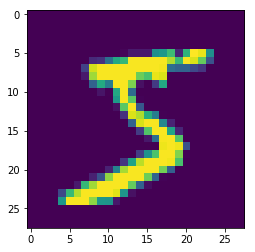

In [19]:
plt.imshow(x_train[0])